<a href="https://colab.research.google.com/github/Abi-Lowkey/MachineLearningTasks/blob/main/UTSMachineLearning/Classification_model_on_adult_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Ketut Satria Wibisana

NIM : 1103213148

Lecture Midterm : Classification model

Dataset : adult.data

Model : Polynomial/Basis Function, Decision Tree, k-NN, XGBoost Regression

Dokumentasi ChatGPT :[Link](https://chatgpt.com/share/673a507e-57ec-8007-96f2-2106d6c3c950)

# **Prompt ChatGPT: berikan kode untuk menyambungkan google drive dengan google colab**

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [ ]:
# Daftar nama kolom
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]

# Memuat dataset
data = pd.read_csv('/content/drive/MyDrive/Dataset/adult.data', header=None, names=columns, skipinitialspace=True)

# Menampilkan 5 baris pertama untuk memastikan data telah dimuat dengan benar
data.head()



,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# **1. Explanatory Data Analysis (EDA) & Data Visualization**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
# Memeriksa nilai yang hilang
print("\nCek Nilai Hilang:")
print(data.isnull().sum())


Cek Nilai Hilang:
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


In [ ]:
# Distribusi data numerik
print("\nStatistik Deskriptif:")
print(data.describe())


Statistik Deskriptif:
                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


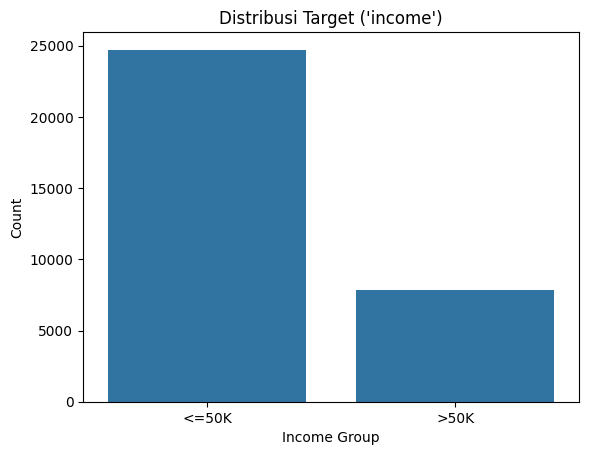

In [ ]:
# Distribusi kategori target
sns.countplot(data=data, x="income")
plt.title("Distribusi Target ('income')")
plt.xlabel("Income Group")
plt.ylabel("Count")
plt.show()

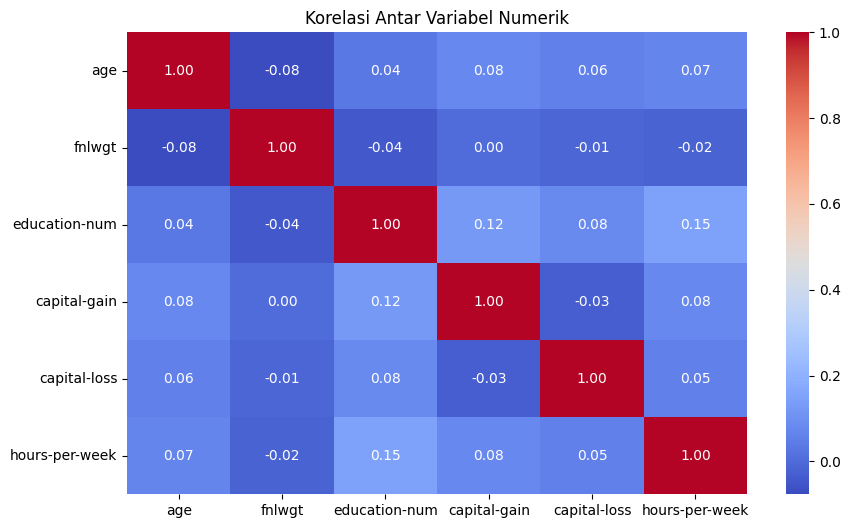

In [ ]:
# Pastikan hanya kolom numerik yang digunakan
numerical_cols = data.select_dtypes(include=["int64", "float64"]).columns
data_numerical = data[numerical_cols].astype(float)  # Konversi ke float

# Membuat heatmap korelasi
plt.figure(figsize=(10, 6))
sns.heatmap(data_numerical.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Korelasi Antar Variabel Numerik")
plt.show()

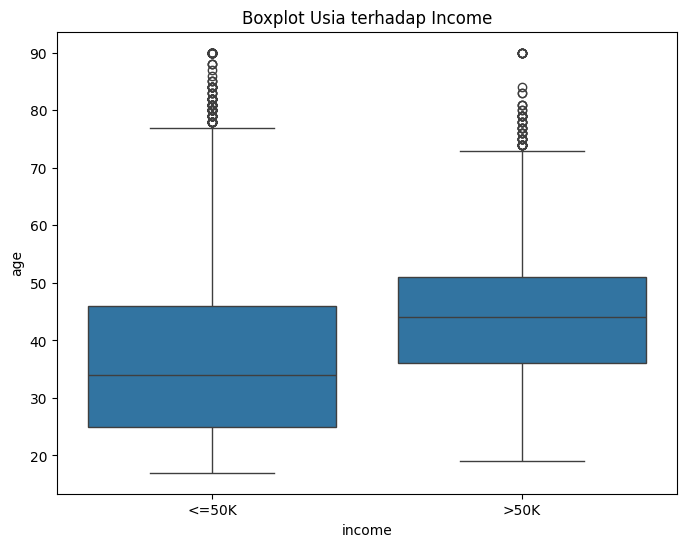

In [ ]:
# Boxplot untuk hubungan antara 'age' dan 'income'
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x="income", y="age")
plt.title("Boxplot Usia terhadap Income")
plt.show()

# **2. Pipeline Model dengan Scikit-learn**

In [ ]:
# Pisahkan fitur dan target
X = data.drop("income", axis=1)
y = data["income"].apply(lambda x: 1 if x == ">50K" else 0)

In [ ]:
# Identifikasi tipe data
categorical_features = X.select_dtypes(include=["object"]).columns
numerical_features = X.select_dtypes(include=["int64", "float64"]).columns


In [ ]:
# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ]
)

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
#  Logistic Regression
pipeline_lr = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000))
])
pipeline_lr.fit(X_train, y_train)
y_pred_lr = pipeline_lr.predict(X_test)
print("Logistic Regression Report:")
print(classification_report(y_test, y_pred_lr))


Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      7455
           1       0.74      0.61      0.66      2314

    accuracy                           0.86      9769
   macro avg       0.81      0.77      0.79      9769
weighted avg       0.85      0.86      0.85      9769



In [ ]:
# Decision Tree
pipeline_dt = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", DecisionTreeClassifier(random_state=42))
])
pipeline_dt.fit(X_train, y_train)
y_pred_dt = pipeline_dt.predict(X_test)
print("Decision Tree Report:")
print(classification_report(y_test, y_pred_dt))

Decision Tree Report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      7455
           1       0.59      0.63      0.61      2314

    accuracy                           0.81      9769
   macro avg       0.74      0.75      0.74      9769
weighted avg       0.81      0.81      0.81      9769



In [ ]:
#  k-NN
pipeline_knn = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", KNeighborsClassifier())
])
pipeline_knn.fit(X_train, y_train)
y_pred_knn = pipeline_knn.predict(X_test)
print("k-NN Report:")
print(classification_report(y_test, y_pred_knn))

k-NN Report:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      7455
           1       0.65      0.60      0.62      2314

    accuracy                           0.83      9769
   macro avg       0.77      0.75      0.76      9769
weighted avg       0.83      0.83      0.83      9769



In [ ]:
# XGBoost
pipeline_xgb = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42))
])
pipeline_xgb.fit(X_train, y_train)
y_pred_xgb = pipeline_xgb.predict(X_test)
print("XGBoost Report:")
print(classification_report(y_test, y_pred_xgb))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:49:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.92      7455
           1       0.76      0.67      0.71      2314

    accuracy                           0.87      9769
   macro avg       0.83      0.80      0.81      9769
weighted avg       0.87      0.87      0.87      9769



# **3. Hyperparameter Tuning**

In [ ]:
# Logistic Regression Tuning
param_grid_lr = {"classifier__C": [0.1, 1, 10], "classifier__solver": ["lbfgs", "liblinear"]}
grid_lr = GridSearchCV(pipeline_lr, param_grid_lr, cv=5, scoring="accuracy")
grid_lr.fit(X_train, y_train)
print("Best Logistic Regression Params:", grid_lr.best_params_)
print("Best Logistic Regression Score:", grid_lr.best_score_)

Best Logistic Regression Params: {'classifier__C': 1, 'classifier__solver': 'lbfgs'}
Best Logistic Regression Score: 0.8516585673420719


In [ ]:
# Decision Tree Tuning
param_grid_dt = {"classifier__max_depth": [3, 5, 10], "classifier__min_samples_split": [2, 5, 10]}
grid_dt = GridSearchCV(pipeline_dt, param_grid_dt, cv=5, scoring="accuracy")
grid_dt.fit(X_train, y_train)
print("Best Decision Tree Params:", grid_dt.best_params_)
print("Best Decision Tree Score:", grid_dt.best_score_)

Best Decision Tree Params: {'classifier__max_depth': 10, 'classifier__min_samples_split': 10}
Best Decision Tree Score: 0.8526677337864887


In [ ]:

# k-NN Tuning
param_grid_knn = {"classifier__n_neighbors": [3, 5, 7], "classifier__weights": ["uniform", "distance"]}
grid_knn = GridSearchCV(pipeline_knn, param_grid_knn, cv=5, scoring="accuracy")
grid_knn.fit(X_train, y_train)
print("Best k-NN Params:", grid_knn.best_params_)
print("Best k-NN Score:", grid_knn.best_score_)

Best k-NN Params: {'classifier__n_neighbors': 7, 'classifier__weights': 'uniform'}
Best k-NN Score: 0.834328001808669


In [ ]:
# XGBoost Tuning
param_grid_xgb = {"classifier__n_estimators": [50, 100, 150], "classifier__max_depth": [3, 5, 7]}
grid_xgb = GridSearchCV(pipeline_xgb, param_grid_xgb, cv=5, scoring="accuracy")
grid_xgb.fit(X_train, y_train)
print("Best XGBoost Params:", grid_xgb.best_params_)
print("Best XGBoost Score:", grid_xgb.best_score_)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:54:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:54:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:54:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:54:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:54:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Best XGBoost Params: {'classifier__max_depth': 3, 'classifier__n_estimators': 150}
Best XGBoost Score: 0.8733767239357298
